In [1]:
import scipy.io as mt # to load .mat MATLAB file
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

Loading data from a MATLAB binary file with extension `.mat`
data into a dictionary, where X and y elements are numpy arrays.

In [2]:
data = mt.loadmat('ex3data1.mat')
#data is a dictionary and each element is a numpy array
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

In [3]:
print('X shape is: ', data['X'].shape) # shape of X (5000,400)
print('y shape is: ', data['y'].shape) # shape of y (5000,1)


X shape is:  (5000, 400)
y shape is:  (5000, 1)


shape of XX: (5000, 401)
shape of y: (5000,)


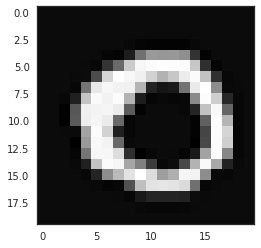

In [4]:
# add one column for intercept
XX = np.c_[np.ones((data['X'].shape[0],1)), data['X']] #(5000,401)
y = data['y'][:,0]                                    #(5000,1)
print('shape of XX: {}'.format(XX.shape)) #(5000,401)
print('shape of y: {}'.format(y.shape)) #(5000,)

# to test, reshape a 400 vector to a 20x20 pixels picture
x1 = XX[5,1:].reshape([20,20])
pl.imshow(x1,cmap='gray')
pl.show()

[ 9  6  7  3  3  7  4 10  5  7  5  6  9  9  5  4 10  1  1  3  3  1  5  6
  4]


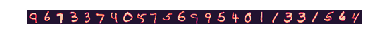

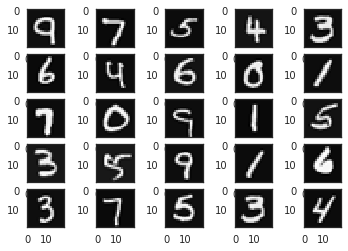

In [5]:
# randomly choose 25 picture and plot them
indx = np.random.choice(XX.shape[0],25)
pl.imshow(XX[indx,1:].reshape(-1,20).T)
pl.axis('off')

# Different way for plotting
dfig = XX[indx,1:].reshape([25,20,20])
print(y[indx])
fig, ax = pl.subplots(5,5)
for i in range(5):
    for j in range(5):
        ax[j,i].imshow(dfig[i*5+j,:,:].T, cmap='gray')
pl.show()

#### Sigmoid function
$$ g(z) = \frac{1}{1+e^{-z}} $$

In [6]:
def sigmoid(h):
    return (1./ (1 + np.exp(-h)))


#### Regularized Cost Function
$$ J(\theta) = \frac{1}{m} \sum_{i=1}^m [-y^{(i)} \ln(h_\theta(x^{(i)})) - (1-y^{(i)})\ln(1-h_\theta(x^{(i)}))] + \frac{\lambda}{2m}\sum_{i=1}^n \theta_j^2$$

#### Vectorized Cost Function


In [7]:
def costF(theta,beta,XX,y):
    """Vectorized regularized logistic cost function
    XX: features,
    y: target, labels
    theta: hypothesis coefficient
    beta: regularization parameter"""
    
    m = y.shape[0]
    h = sigmoid(XX.dot(theta))
    
    J = (-1./m) * ( y.T.dot(np.log(h)) + (1-y).T.dot(np.log(1-h)) - \
                      0.5*beta*theta[1:].T.dot(theta[1:]) )
    if np.isnan(J):
        return(np.inf)
    
    return J

In [8]:
def grad_costF(theta,beta,XX,y):
    """The gradient of regularized logistic cost function."""
    m = y.shape[0]
    h = sigmoid(XX.dot(theta))
    aux = ( (1./m) * ( XX.T.dot(h - y) + beta*np.r_[0,theta[1:]] ) )
    #print('aux shape', aux.shape)
    return aux
    

In [9]:
from scipy.optimize import minimize
def oneVsall(XX, y, Nlabels, beta):
    theta_int = np.zeros((XX.shape[1])) # (401,1)
    all_theta = np.zeros((Nlabels,XX.shape[1])) # (10,401)
    
    for i in range(1,Nlabels+1):
        target_i = (y==i)*1        # training for y = i
        res = minimize(costF, theta_int, args=(beta,XX, target_i), method=None,
                        jac=grad_costF, options={'maxiter':50})
        all_theta[i-1] = res.x
    return(all_theta)


In [10]:
theta = oneVsall(XX,y,10,0.1)

aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401

aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)
aux shape (401,)


In [11]:
theta

array([[-2.39142338e+00,  0.00000000e+00,  0.00000000e+00, ...,
         6.90403614e-04,  1.25548916e-07,  0.00000000e+00],
       [-3.01137869e+00,  0.00000000e+00,  0.00000000e+00, ...,
         1.48908371e-03, -1.69495224e-04,  0.00000000e+00],
       [-4.51398334e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.60669585e-05,  3.43368479e-07,  0.00000000e+00],
       ...,
       [-8.41428002e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -6.96539602e-05,  6.26414118e-06,  0.00000000e+00],
       [-5.13253825e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.54282889e-04,  5.92217956e-06,  0.00000000e+00],
       [-4.38685169e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -3.60354278e-04,  9.53842298e-06,  0.00000000e+00]])

In [12]:
def predictOneVsAll(all_theta, XX):
    probs = sigmoid(XX.dot(all_theta.T))
        
    # Adding one because Python uses zero based indexing for the 10 columns (0-9),
    # while the 10 classes are numbered from 1 to 10.
    return(np.argmax(probs, axis=1)+1)

In [13]:
pred = predictOneVsAll(theta, XX)
print('Training set accuracy: {} %'.format(np.mean(pred == y)*100))

Training set accuracy: 93.24 %


#### Logistic Regression with scikit-learn

In [14]:
import sklearn.linear_model as skl

In [15]:
clf = skl.LogisticRegression(C=10, penalty='l2', solver='liblinear')
# Scikit-learn fits intercept automatically, so we exclude the intercept column 
clf.fit(XX[:,1:], y) #fitting the features with targets

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
pred2 = clf.predict(XX[:,1:])
print('Training set accuracy: {} %'.format(np.mean(pred2==y)*100))
pred2

Training set accuracy: 96.5 %


array([10, 10, 10, ...,  9,  9,  7], dtype=uint8)

#### Neural Network FeedForward Propagation

In [17]:
weights = mt.loadmat('ex3weights.mat')

In [18]:
weights.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Theta1', 'Theta2'])

In [19]:
theta1 = weights['Theta1']
theta2 = weights['Theta2']
print(theta1.shape)
print(theta2.shape)

(25, 401)
(10, 26)


In [20]:
def forwardPredict(XX,theta1,theta2):
    z2 = XX.dot(theta1.T)
    a20 = sigmoid(z2)
    a2 = np.c_[np.ones((XX.shape[0],1)),a20]
    
    z3 = a2.dot(theta2.T)
    a3 = sigmoid(z3)
    
    return (np.argmax(a3,axis=1)+1)

In [21]:
pred = forwardPredict(XX,theta1, theta2)
np.mean(pred==y)

0.9752